# (공부) R_ggplot2
> 작성 완료

- toc:true
- branch: master
- badges: true
- comments: true
- author: kimha02
- categories: [R]

> 참고 : 「R을 활용한 데이터 과학」 1장 내용을 실습한 내용임  
> ggplot2는 구글링해도 좋은 자료들이 많아서 더 예쁘게 시각화하고 싶을 때는 추가 정보를 꼭 찾아볼 것!

## ggplot2
- ggplot2 ⊂ tidyverse -> library(tidyverse)가 더 편하겠다
- `+` 표시는 항상 마지막에 넣어준다

### (★) ggplot 코드 템플릿  
``` 
ggplot(data=NAME)+
geom_함수(mapping=aes(x=NAME, y=NAME, color=NAME),
        stat=STAT,
        position=POSITION)+
좌표계함수 + 면분할함수
```

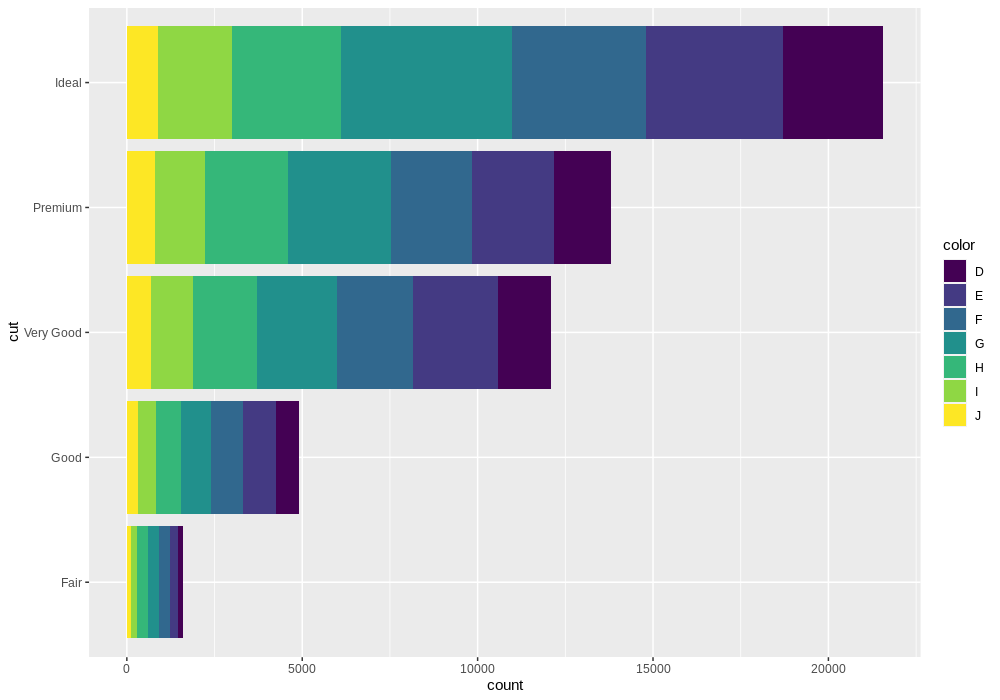

In [149]:
#EX
ggplot(data=dia)+
geom_bar(mapping=aes(x=cut, fill=color), stat="count", position="stack")+
coord_flip()

-------

### 1. geom_point

0) 기본 형태
> ``` python
    ggplot(data = NAME)+
    geom_point(mapping = aes(x = NAME, y = NAME))
```  

In [4]:
library(tidyverse)

In [33]:
#install.packages('patchwork')
library(patchwork)

In [7]:
dia<-diamonds; str(dia)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


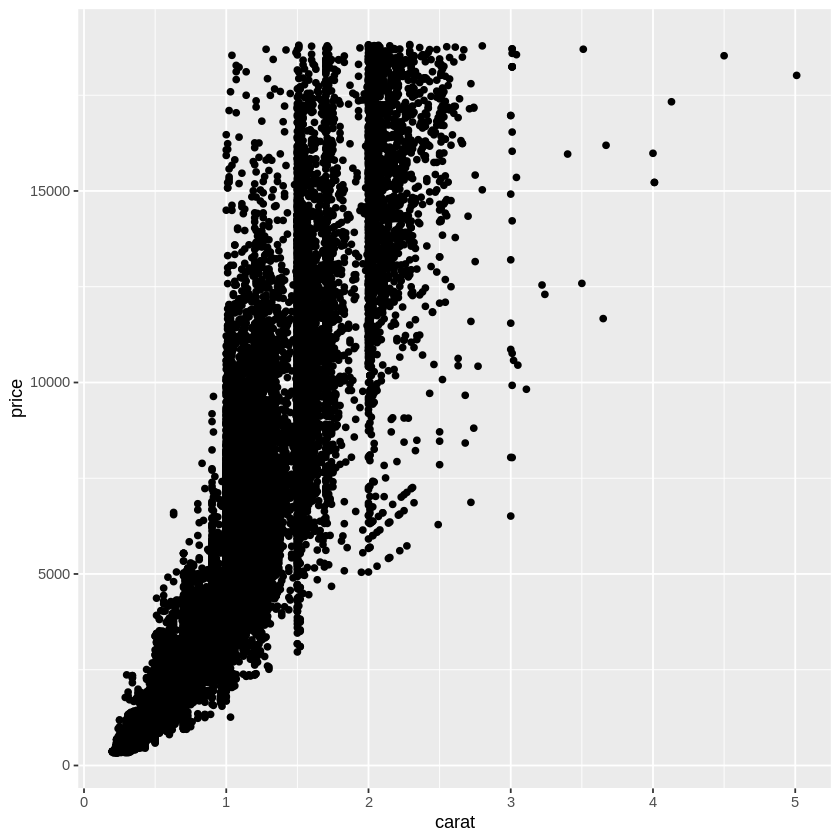

In [11]:
ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price))

1) 그룹별로 차이를 주고 싶을 때  
`-` aes 안에 심미성 요소 를 넣어준다  
`-` `color`, `size`, `alpha`, `shape`

In [35]:
#color
a<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, color=cut))+ggtitle('color')
#color_1가지 색으로만
b<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price), color="blue")+ggtitle('one_color')
#size_크기
c<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, size=cut))+ggtitle('size')
#alpha_투명도
d<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, alpha=cut))+ggtitle('alpha')
#shape_점모양
e<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, shape=cut))+ggtitle('shape')  #shape은 6개까지만

Warning message:
“Using shapes for an ordinal variable is not advised”


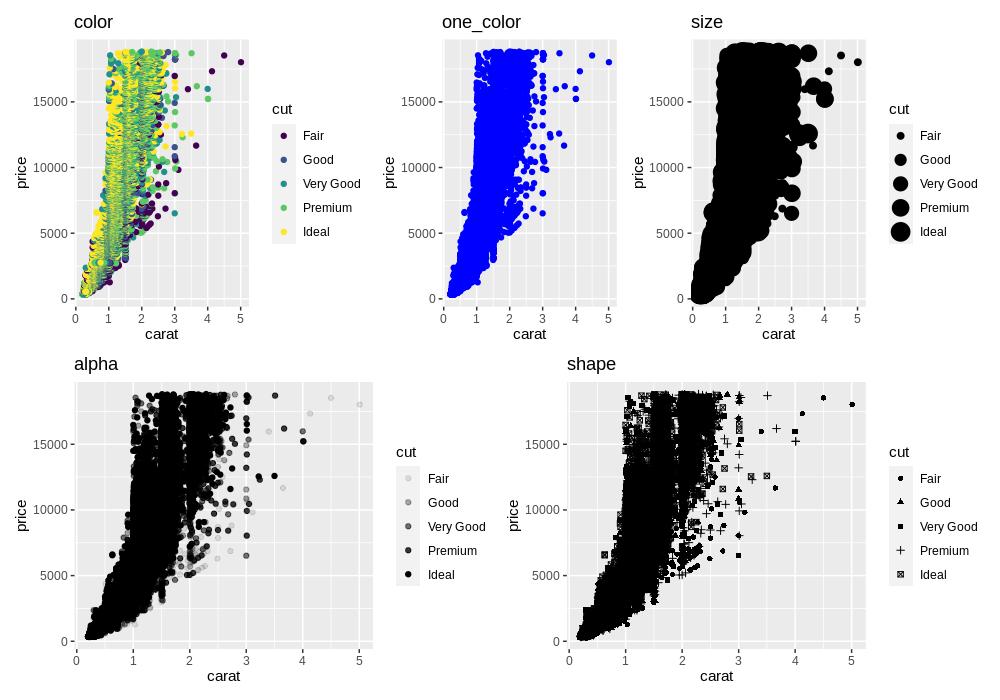

In [62]:
options(repr.plot.width=10, repr.plot.height=7,repr.plot.res=100)
(a+b+c)/(d+e)   #patchwork   

2) 오버 플로팅을 방지하고 싶을 때  
`-` `position = "jitter"`로 조금씩 움직일 수 있다  
`-` `geom_jitter` 도 가능

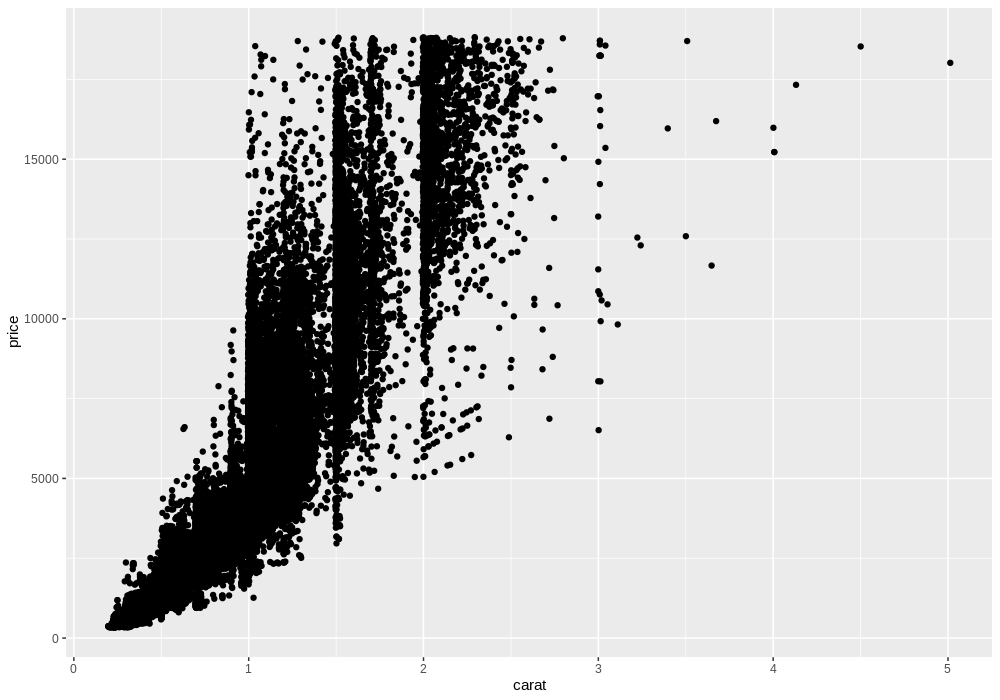

In [63]:
ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price), position="jitter")

3) 면분할  
`-` `facet_wrap` : 한 개의 변수로 면분할, 이산형 변수만 사용 가능하다  
`-` `fece_grid` : 두 개의 변수 조합으로 면분할  

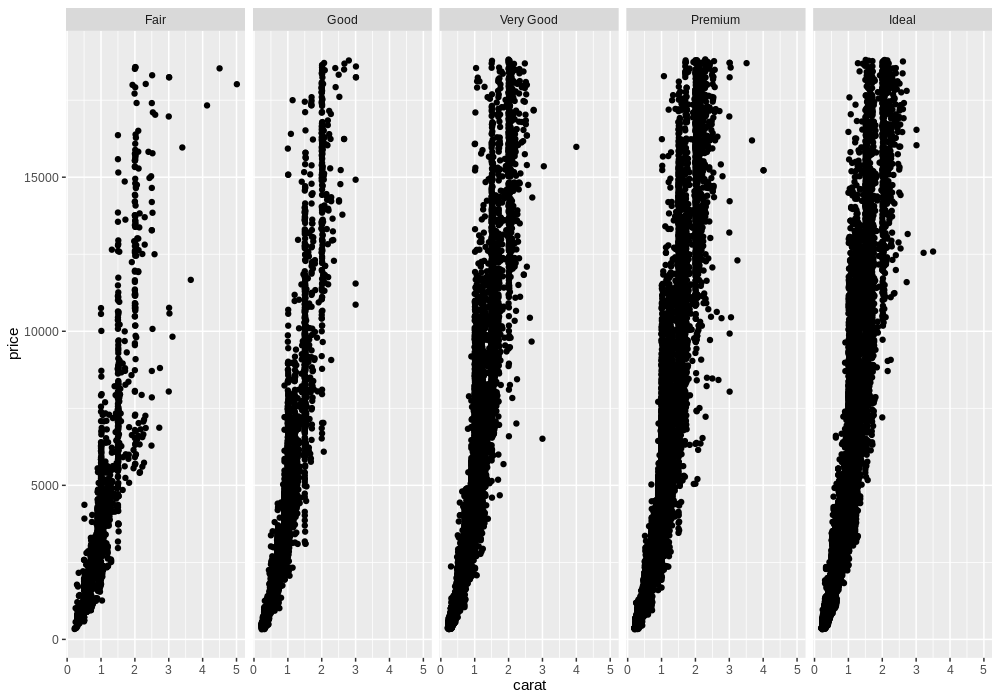

In [64]:
ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price))+
facet_wrap(~cut, nrow=1)

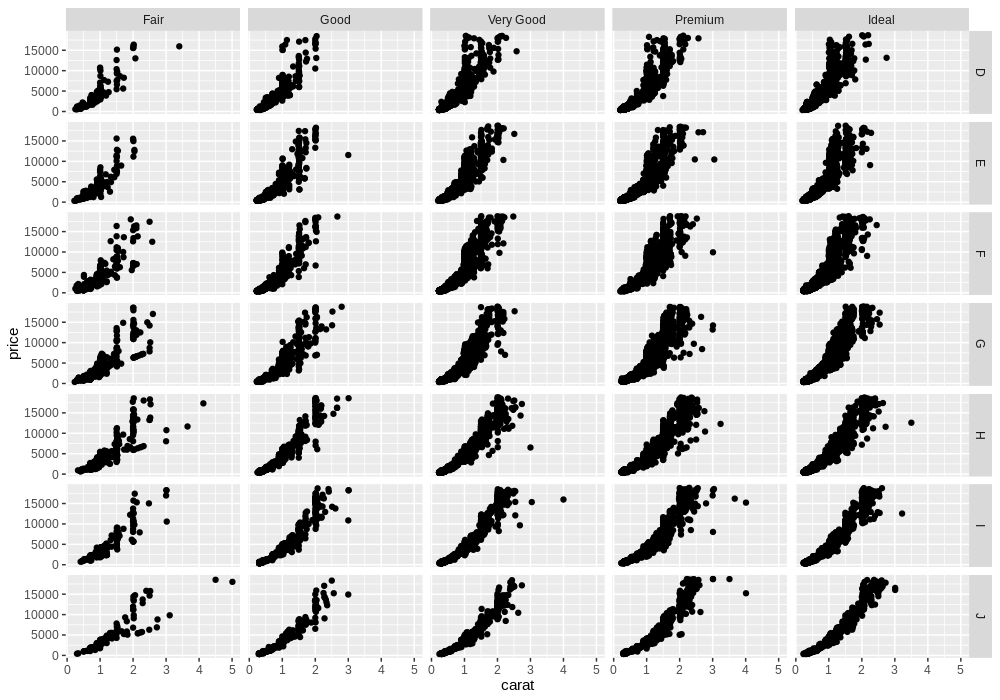

In [65]:
ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price))+
facet_grid(color~cut)

-------

### 2. geom_smooth

0) 기본 형태
- 평활 geom 이다.
> ``` python
    ggplot(data = NAME)+
    geom_smooth(mapping = aes(x = NAME, y = NAME))
```  

1. 그룹별로 차이를 주고 싶을 때
- `aes` 안에 심미성 요소 를 넣어준다
- `linetype`, `color`

In [69]:
#linetype
a<-ggplot(data=dia)+geom_smooth(mapping=aes(x=carat, y=price, linetype=cut))
#color
b<-ggplot(data=dia)+geom_smooth(mapping=aes(x=carat, y=price, color=cut))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



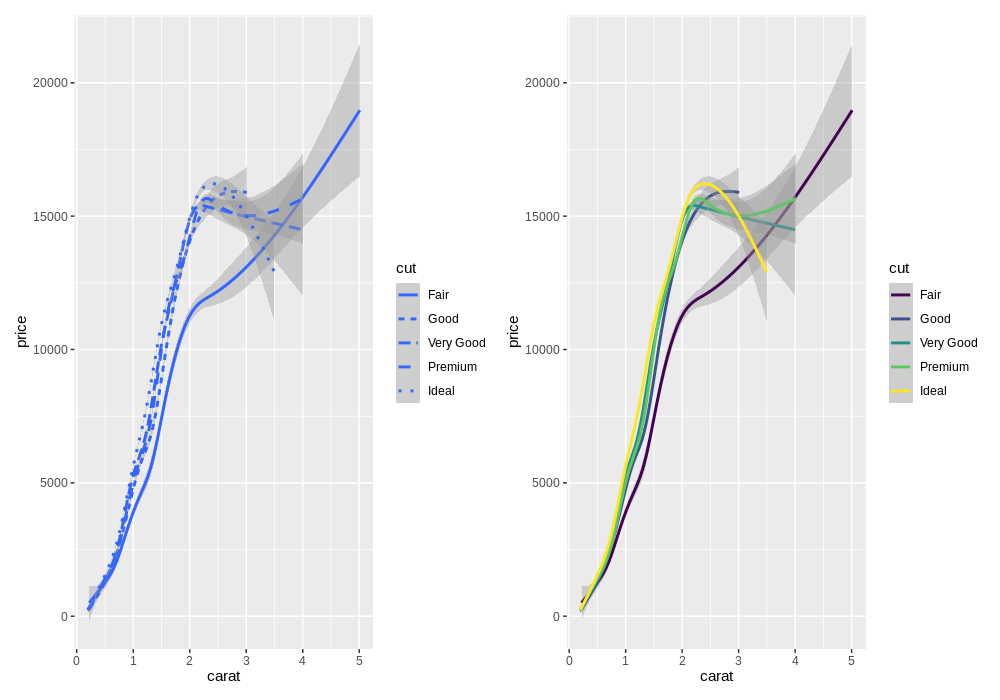

In [70]:
a+b

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



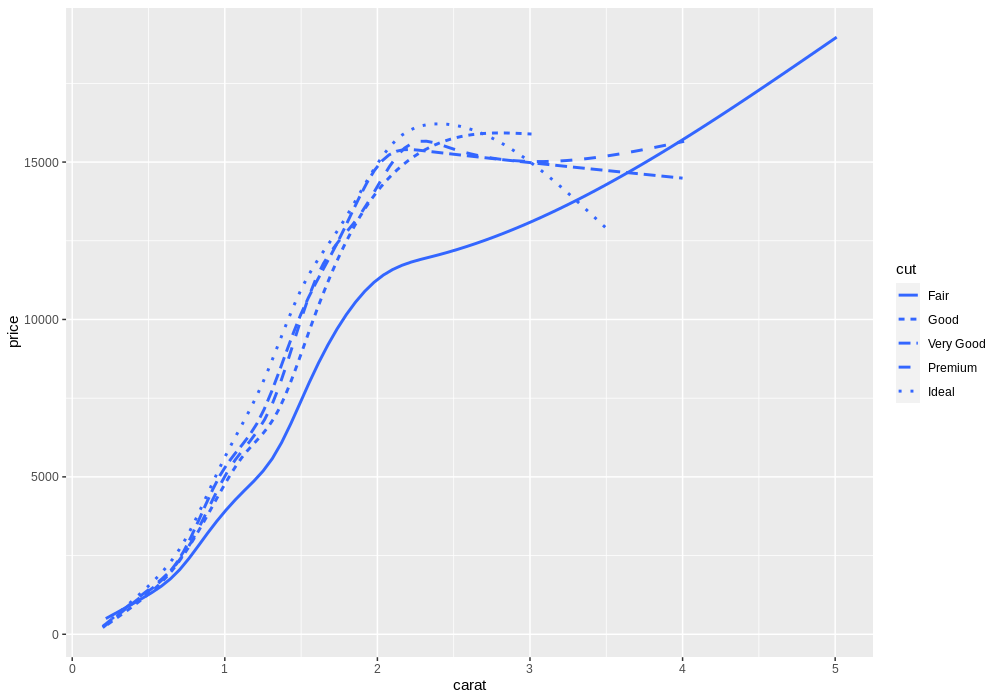

In [71]:
#shade 제거
ggplot(data=dia)+geom_smooth(mapping=aes(x=carat, y=price, linetype=cut), se=F)

2. 특정 데이터만 보고 싶을 때
- `filter` 사용
    - 아래는 price가 10,000 보다 큰 data만 사용한 그림이다

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



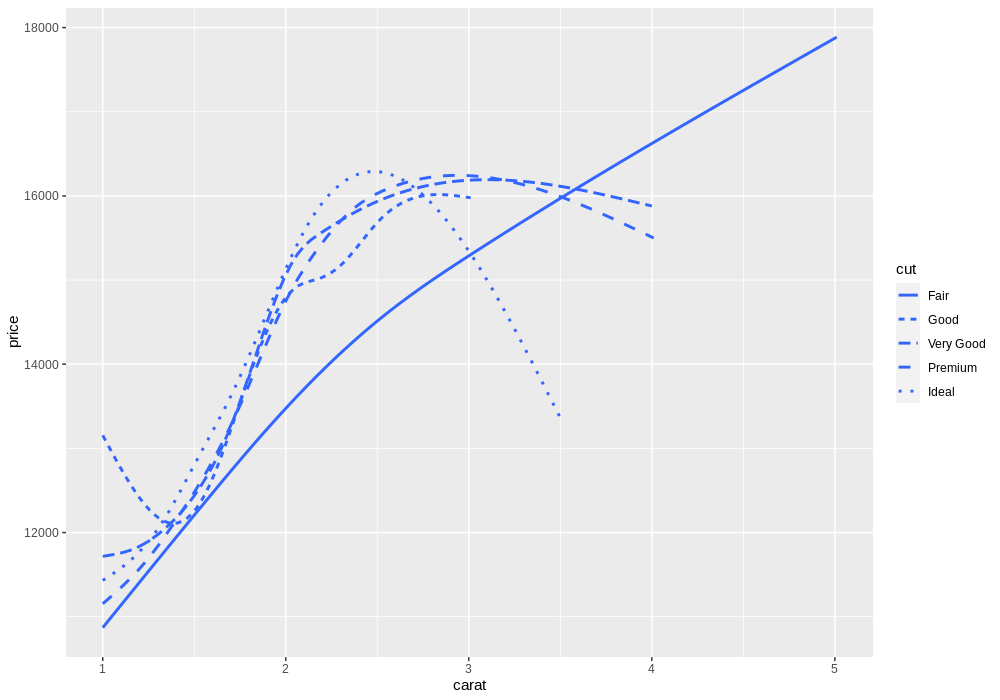

In [84]:
ggplot(data=filter(dia, price>10000))+geom_smooth(mapping=aes(x=carat, y=price, linetype=cut), se=F)

-------

#### (*) geom_point + geom_smooth
- 같이 쓰면 `ggplot` 안에 데이터명, x, y 지정을 한 번에 해주면 편하다. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



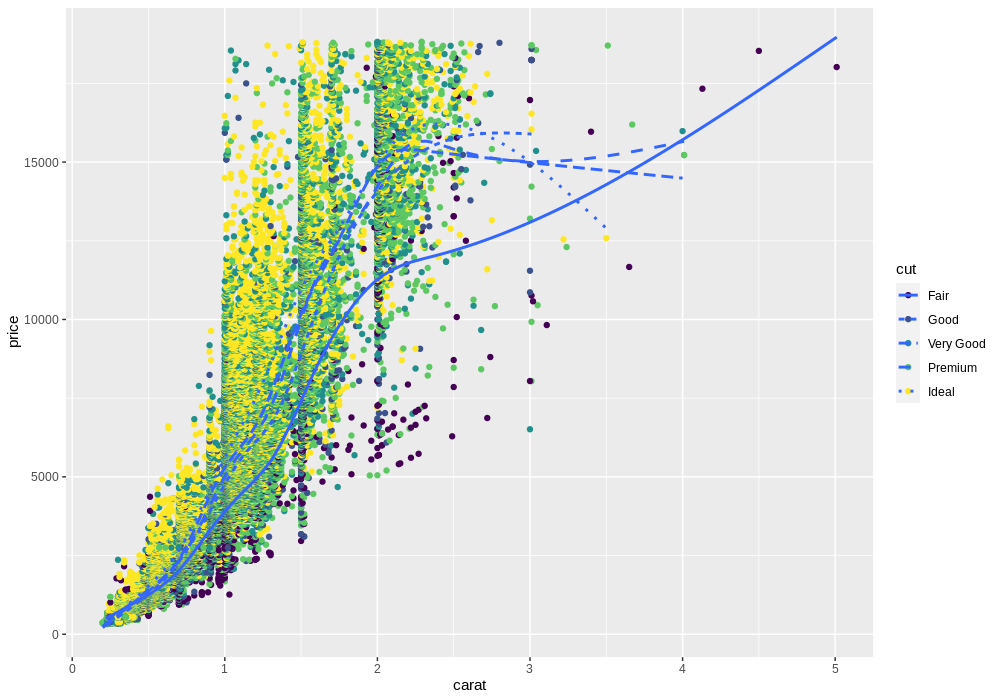

In [74]:
ggplot(data=dia, mapping=aes(x=carat, y=price))+
geom_point(mapping=aes(color=cut))+
geom_smooth(mapping=aes(linetype=cut), se=F)

-------

### 3. geom_bar

0) 기본 형태
- 막대그래프로, `y`에는 count()가 들어간다. 각 막대들을 bin이라고 생각하면 편하다!
> ``` python
    ggplot(data = NAME)+
    geom_bar(mapping = aes(x = NAME))
```  

1. 그룹별로 차이를 주고 싶을 때  
- `fill`으로 채우기 색 변화
- `color`로 테두리 색 변화
- `dodge`로 그룹핑해 한 번에 확인하기

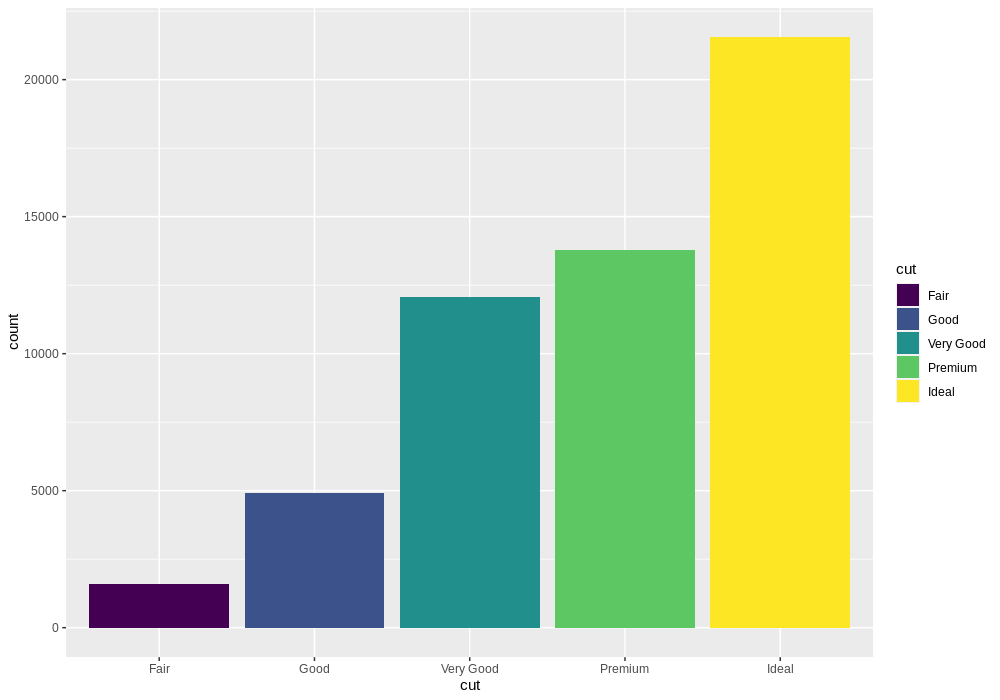

In [101]:
#fill
ggplot(data = dia)+
geom_bar(mapping = aes(x = cut, fill=cut))

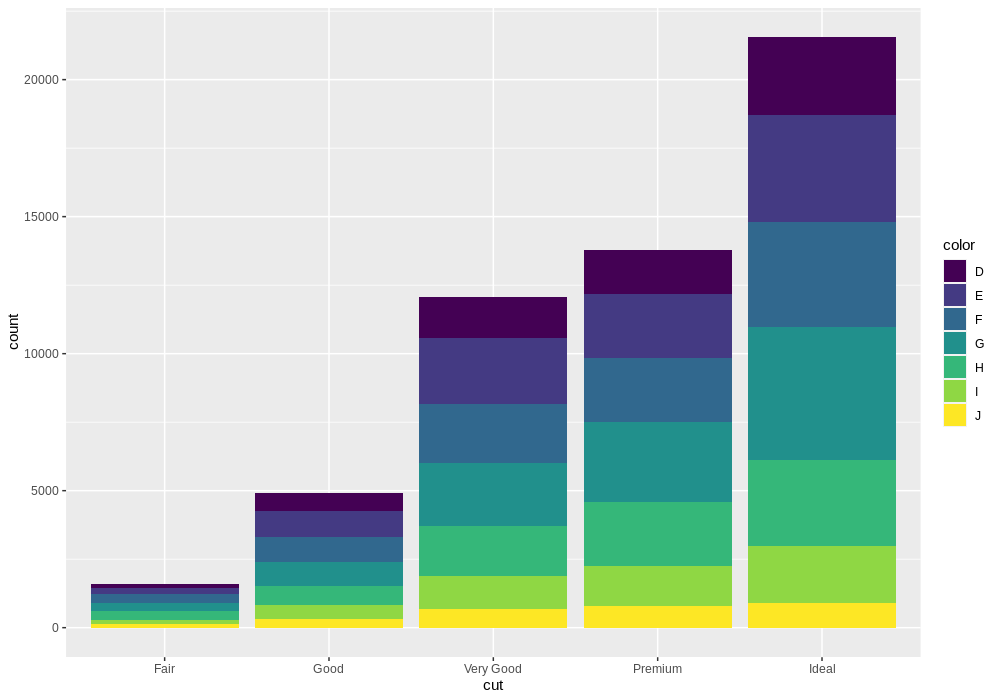

In [102]:
#fill의 다른 예시
ggplot(data = dia)+
geom_bar(mapping = aes(x = cut, fill=color))

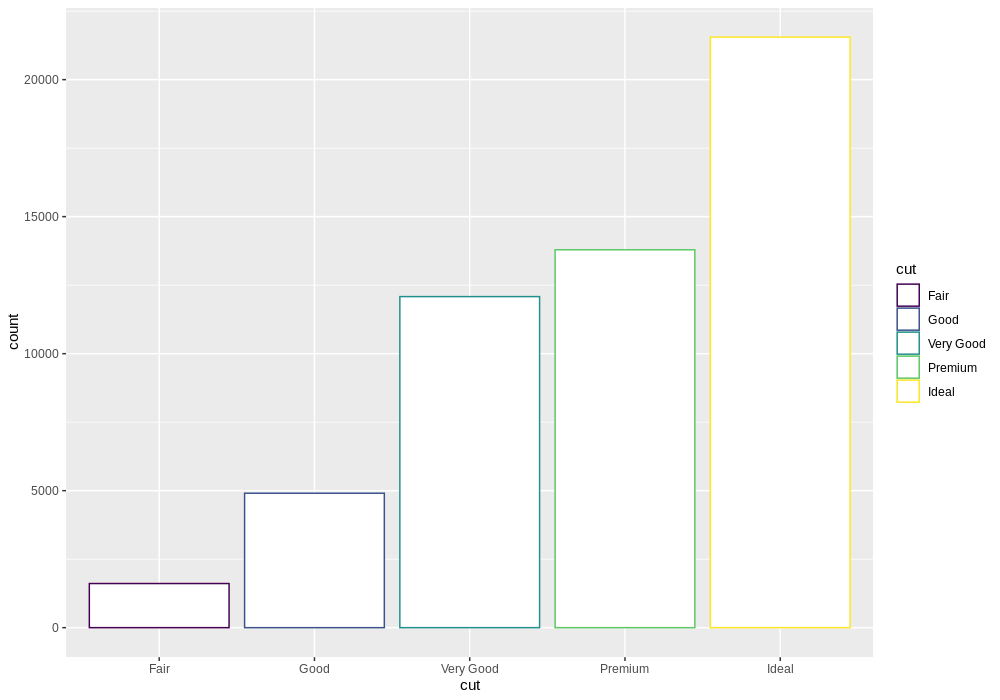

In [96]:
#color
ggplot(data = dia)+
geom_bar(mapping = aes(x = cut, color=cut), fill='white')

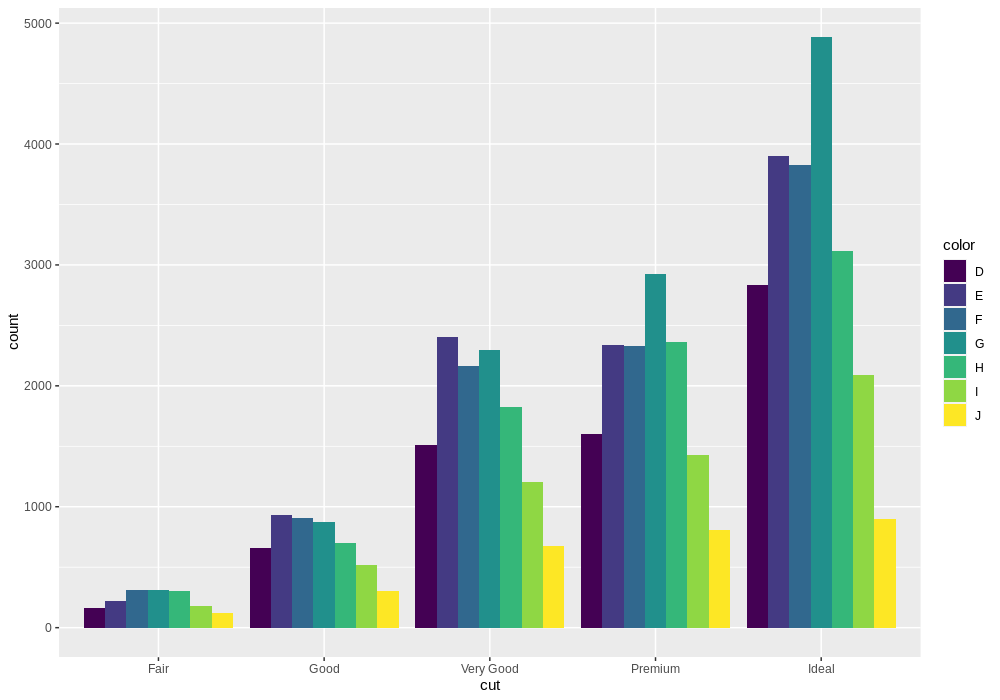

In [116]:
#dodge
ggplot(dia) + 
  geom_bar(aes(x = cut, fill = color), position = "dodge")

2. 비율(%) 로 표시하고 싶을 때
- `..prop..` 추가

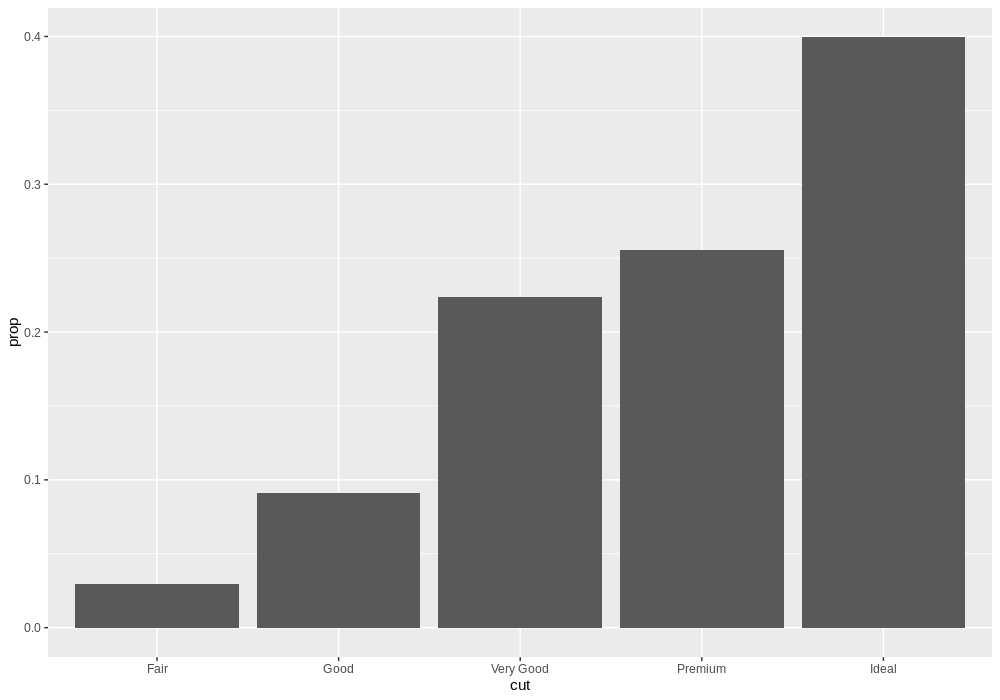

In [164]:
ggplot(data = dia)+
geom_bar(mapping = aes(x = cut, y=..prop..,group=3))  #책에는 group=1이라고 되어있는데 아무거나 넣어도 상관없나보다

- 각 항목의 color의 분포 정도를 보고 싶을 때 $\to$ 내가 생각한 비율로 보는 그래프에 가까운 것 같아

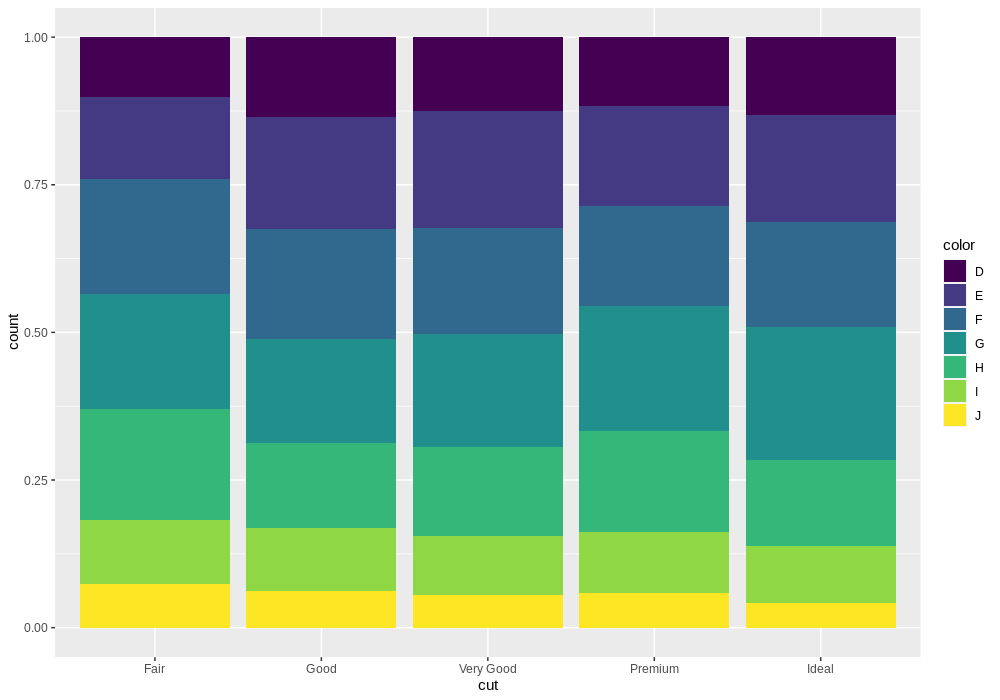

In [161]:
ggplot(dia) + 
  geom_bar(aes(x = cut, fill =color), position = "fill")

-------

### 4. stat_summary

0) 기본 형태
- y값 요약해줘!
> ``` python
    ggplot(data = NAME)+
    stat_summary(mapping = aes(x = NAME, y = NAME), fun.y=FUNCTION NAME)
```  

1. 여러 가지 요약값을 보여주는 것도 가능하다  
- 최소값, 중앙값, 최대값 보여주기

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


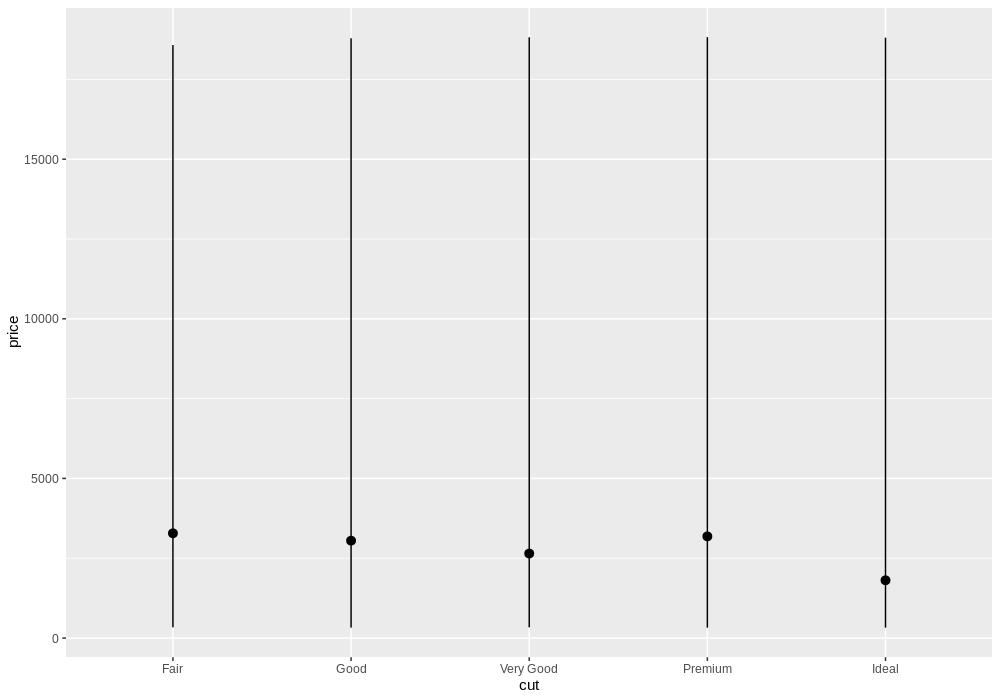

In [174]:
ggplot(dia) + 
  stat_summary(aes(x=cut, y=price) ,fun.ymin=min, fun.ymax=max, fun.y=median)